# Census Display Modeling Project 

## Importing the dataset

In [36]:
import numpy as np

np.random.seed(0)

In [37]:
import pandas as pd

data = pd.read_csv('new_Base_CDM_balanced_V2.csv', sep=';')
data = data.iloc[1:]

In [8]:
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [9]:
data.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [10]:
data.shape

(25782, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 1 to 25782
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Y       25782 non-null  object
 1   X1      25782 non-null  object
 2   X2      25782 non-null  object
 3   X3      25782 non-null  object
 4   X4      25782 non-null  object
 5   X5      25782 non-null  object
 6   X6      25782 non-null  object
 7   X7      25782 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [12]:
data['X5'].value_counts()

CARREFOUR           4629
LECLERC             4257
CASINO              3370
AUCHAN              3003
INTERMARCHE         2701
CORA                1883
CARREFOUR MARKET    1500
SUPER U             1265
SIMPLY MARKET        913
GEANT                761
MONOPRIX             732
MATCH                241
MARCHE U             153
PRISUNIC              99
HYPER U               71
ECOMARCHE             69
OTHERS                60
FRANPRIX              48
SHOPI                 27
Name: X5, dtype: int64

In [13]:
data['X7'].value_counts()

No_Feat    19495
Feat        6287
Name: X7, dtype: int64

In [14]:
data['Y'].value_counts()

No_Displ    13000
Displ       12782
Name: Y, dtype: int64

## Converting to a numerical value

In [15]:
y_classes = {'No_Displ': 0, 'Displ': 1}
data['Y'] = data['Y'].map(y_classes)

In [16]:
x7_classes = {'No_Feat': 0, 'Feat': 1}
data['X7'] = data['X7'].map(x7_classes)

In [17]:
x5_classes = {'CORA': 0, 'LECLERC': 1, 'AUCHAN': 3, 'CARREFOUR': 4, 
              'CASINO': 5, 'SUPER U': 6, 'GEANT': 7, 'CARREFOUR MARKET': 8,
              'FRANPRIX': 9, 'INTERMARCHE': 10, 'ECOMARCHE':11, 'MONOPRIX':12, 
              'SIMPLY MARKET':13, 'OTHERS': 14, 'MATCH':15, 'PRISUNIC':16, 
              'HYPER U': 17, 'SHOPI':18, 'MARCHE U': 19}
data['X5'] = data['X5'].map(x5_classes)

In [18]:
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7
1,0,2,20.2,47400,36,0,72,0
2,0,2,11.9,62000,24,1,48,0
3,0,8,29.52,60661,60,3,480,0
4,0,2,16.2,59677,19,4,38,0
5,0,5,62.1,142602,50,0,250,0


## Correcting the data types

In [19]:
data.dtypes

Y      int64
X1    object
X2    object
X3    object
X4    object
X5     int64
X6    object
X7     int64
dtype: object

In [20]:
data['X1'] = pd.to_numeric(data['X1'], errors='coerce')
data['X2'] = pd.to_numeric(data['X2'], errors='coerce')
data['X3'] = pd.to_numeric(data['X3'], errors='coerce')
data['X4'] = pd.to_numeric(data['X4'], errors='coerce')
data['X5'] = pd.to_numeric(data['X5'], errors='coerce')
data['X6'] = pd.to_numeric(data['X6'], errors='coerce')
data['X7'] = pd.to_numeric(data['X7'], errors='coerce')
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

In [21]:
data.dtypes

Y       int64
X1    float64
X2    float64
X3      int64
X4      int64
X5      int64
X6    float64
X7      int64
dtype: object

## Analyzing the Data

In [22]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Y,25782.0,0.495772,0.499992,0.00,0.00,0.00,1.00,1.00
X1,25782.0,13.767151,38.203406,1.00,2.00,4.00,11.00,1475.00
X2,25782.0,130.888312,372.649805,1.11,13.36,31.05,87.45,13589.22
X3,25782.0,64641.184431,54924.645702,1693.00,21394.00,51522.00,91000.00,284844.00
X4,25782.0,37.646614,23.498949,1.00,25.00,32.00,40.00,198.00
X5,25782.0,5.160267,3.937793,0.00,3.00,4.00,8.00,19.00
X6,25782.0,587.855260,1821.338396,1.00,50.00,120.00,380.00,48816.00
X7,25782.0,0.243852,0.429413,0.00,0.00,0.00,0.00,1.00


In [23]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

%matplotlib inline
figsize(14, 7)

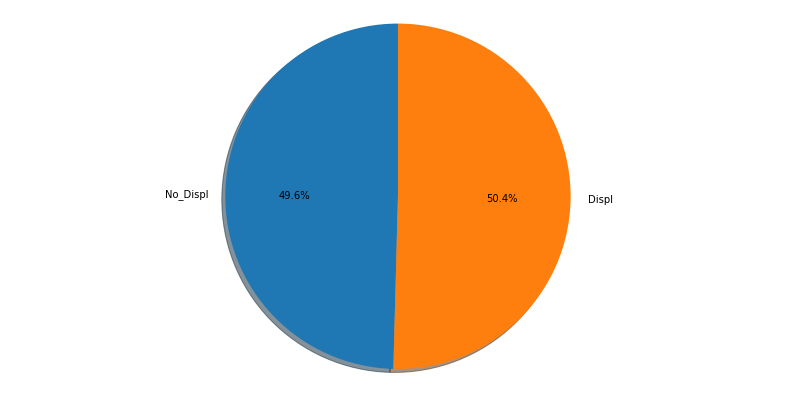

In [44]:
label = 'No_Displ', 'Displ'
sizes = data.groupby('Y').size()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Correlation betbetween variabvariables

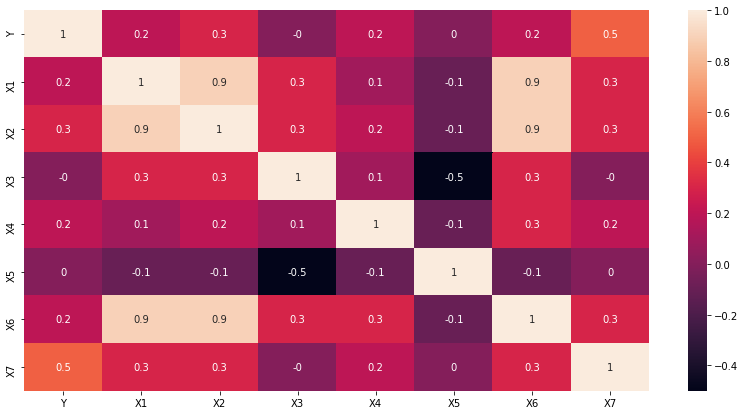

In [25]:
import seaborn as sns

correlation = data.corr()
correlation = correlation.round(1)
sns.heatmap(data=correlation, annot=True)
pass

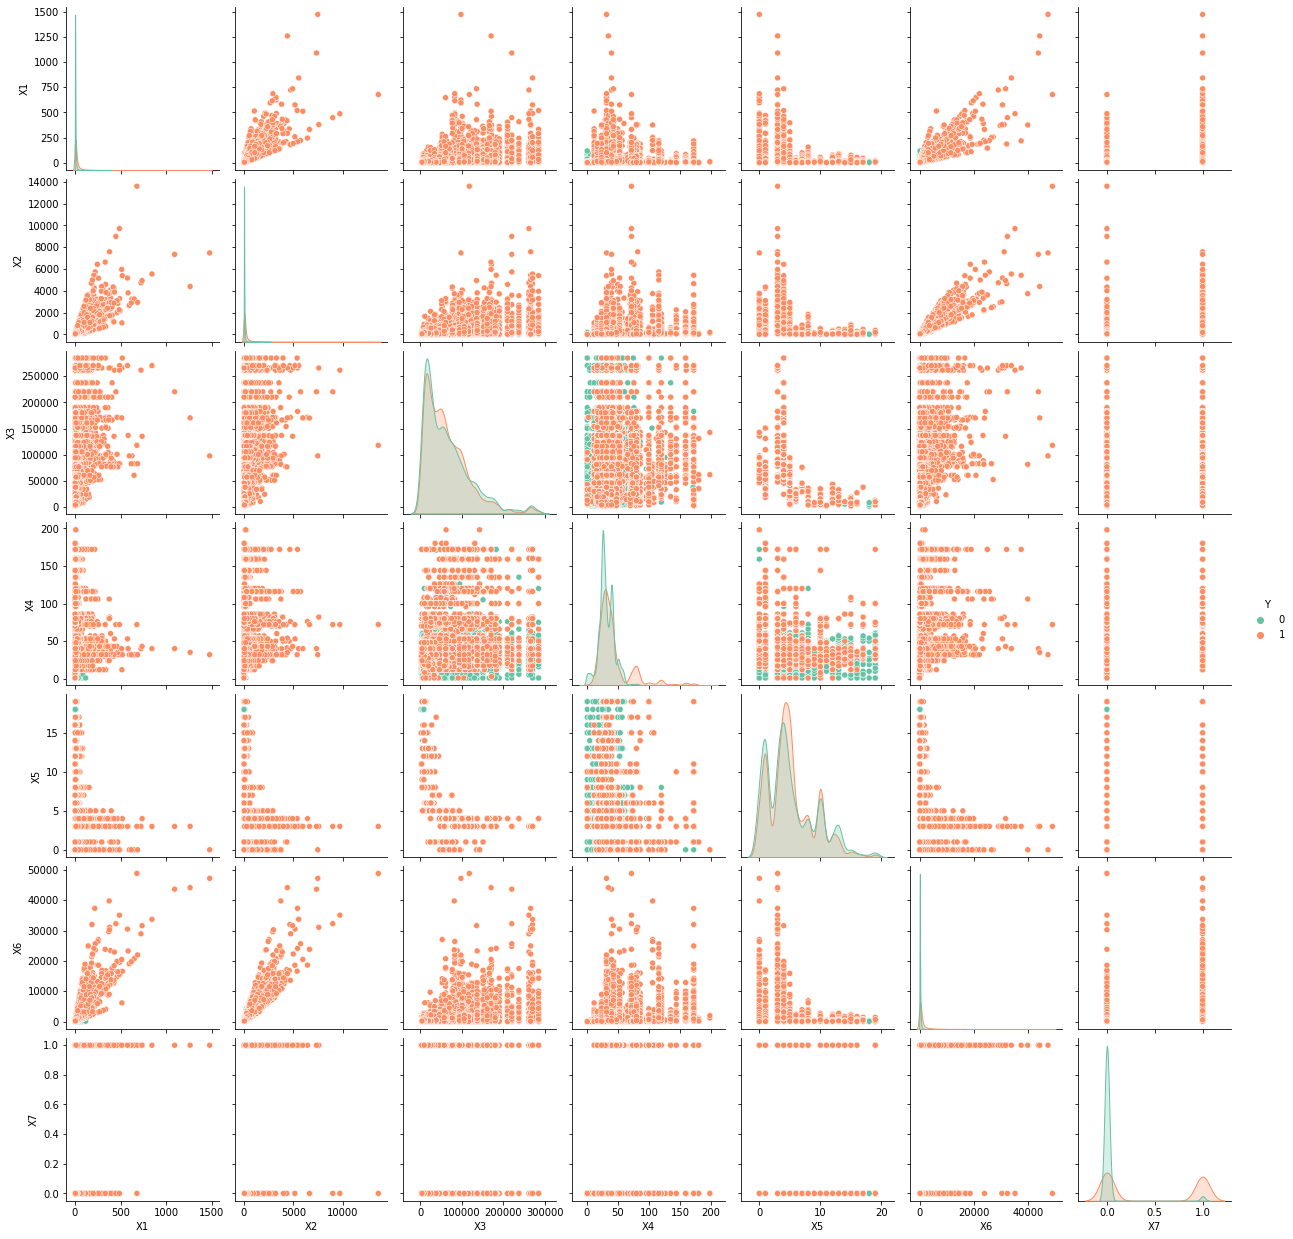

In [20]:
sns.pairplot(data, vars=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], hue='Y', palette="Set2")
pass

## Using Discretization MDLP

In [26]:
X, y = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']].to_numpy(), data['Y'].to_numpy()

In [27]:
from MDLP import MDLP_Discretizer

numeric_features = np.arange(X.shape[1])
discretizer = MDLP_Discretizer(features=numeric_features)
discretizer.fit(X, y)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [29]:
X_train_discretized = discretizer.transform(X_train)
X_train_discretized.shape

(17273, 7)

In [30]:
X_test_discretized = discretizer.transform(X_test)
X_test_discretized.shape

(8509, 7)

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot
    Arguments
    ---------------------------------------------------------------------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1-accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

y_nb_pred = classifier_nb.predict(X_test)

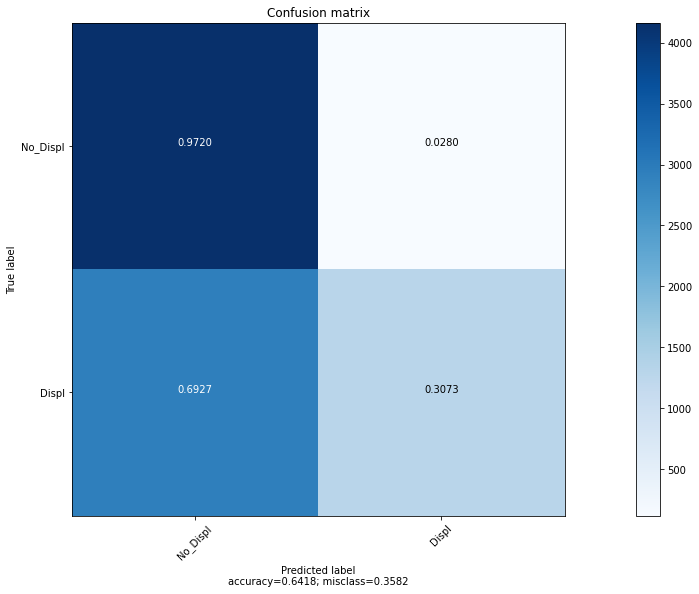

In [47]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_nb_pred), target_names=label, normalize=True)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_nb_pred, target_names=label))

              precision    recall  f1-score   support

    No_Displ       0.59      0.97      0.73      4282
       Displ       0.92      0.31      0.46      4227

    accuracy                           0.64      8509
   macro avg       0.75      0.64      0.60      8509
weighted avg       0.75      0.64      0.60      8509



In [50]:
from sklearn.metrics import accuracy_score

print('Model accuracy is ', accuracy_score(y_test, y_nb_pred))

Model accuracy is  0.6417910447761194


## Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier()
classifier_dt = classifier_dt.fit(X_train,y_train)

y_dt_pred = classifier_dt.predict(X_test)

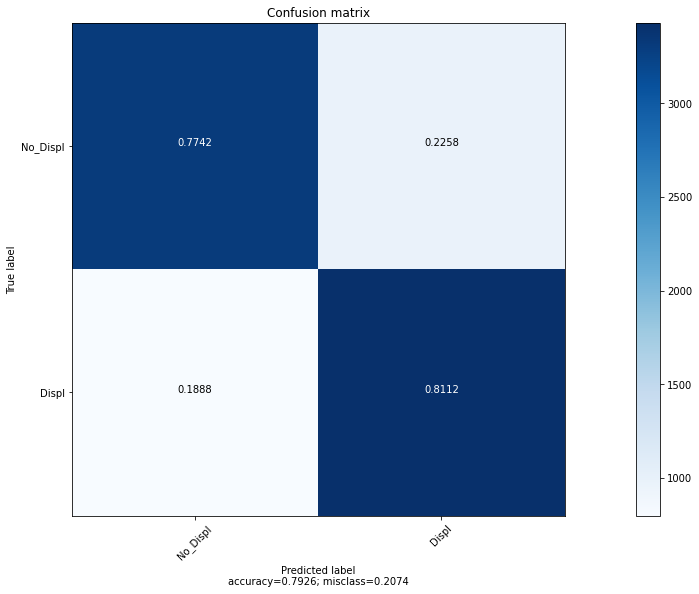

In [79]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_dt_pred), target_names=label, normalize=True)

In [80]:
print(classification_report(y_test, y_dt_pred, target_names=label))

              precision    recall  f1-score   support

    No_Displ       0.81      0.77      0.79      4282
       Displ       0.78      0.81      0.80      4227

    accuracy                           0.79      8509
   macro avg       0.79      0.79      0.79      8509
weighted avg       0.79      0.79      0.79      8509



In [81]:
print('Model accuracy is ', accuracy_score(y_test, y_dt_pred))

Model accuracy is  0.7925725702197673


## Random Forests Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfc=RandomForestClassifier(n_estimators=100)
classifier_rfc.fit(X_train, y_train)

y_rfc_pred=classifier_rfc.predict(X_test)

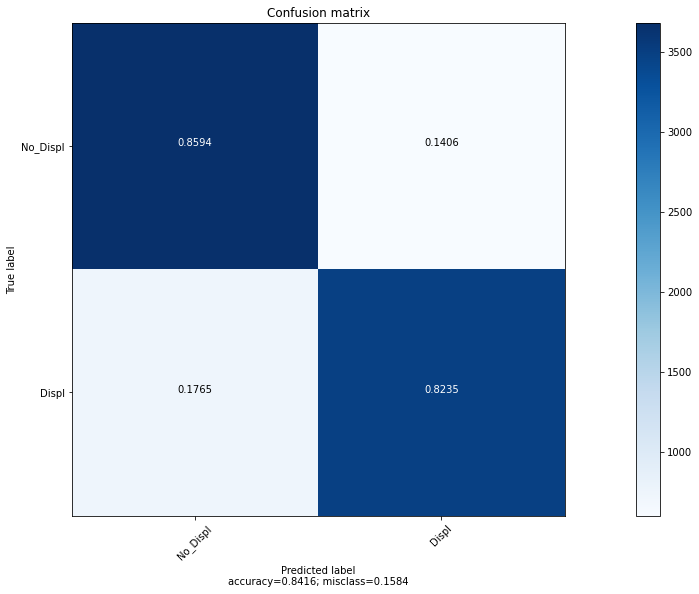

In [52]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_rfc_pred), target_names=label, normalize=True)

In [53]:
print(classification_report(y_test, y_rfc_pred, target_names=label))

              precision    recall  f1-score   support

    No_Displ       0.83      0.86      0.85      4282
       Displ       0.85      0.82      0.84      4227

    accuracy                           0.84      8509
   macro avg       0.84      0.84      0.84      8509
weighted avg       0.84      0.84      0.84      8509



In [54]:
print('Model accuracy is ', accuracy_score(y_test, y_rfc_pred))

Model accuracy is  0.8415795040545305


## K-Nearest Neighbors Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors=9)
classifier_knn.fit(X_train, y_train)

y_knn_pred = classifier_knn.predict(X_test)

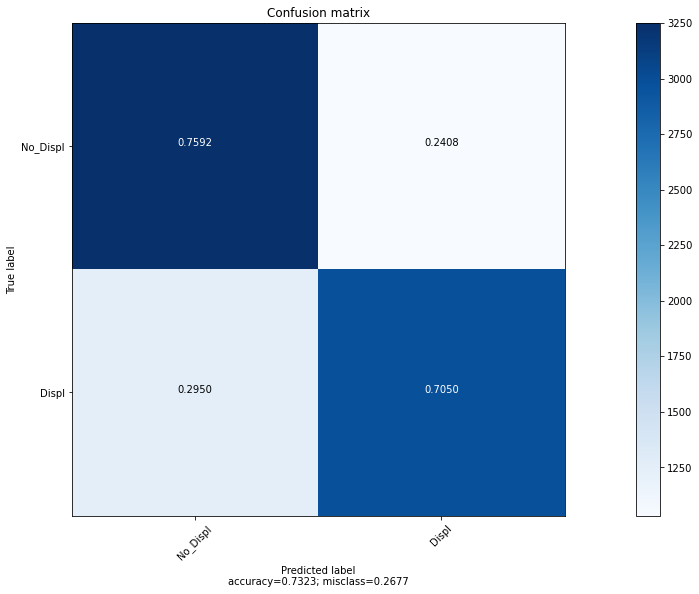

In [63]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_knn_pred), target_names=label, normalize=True)

In [64]:
print(classification_report(y_test, y_knn_pred, target_names=label))

              precision    recall  f1-score   support

    No_Displ       0.72      0.76      0.74      4282
       Displ       0.74      0.70      0.72      4227

    accuracy                           0.73      8509
   macro avg       0.73      0.73      0.73      8509
weighted avg       0.73      0.73      0.73      8509



Optimum K is 0


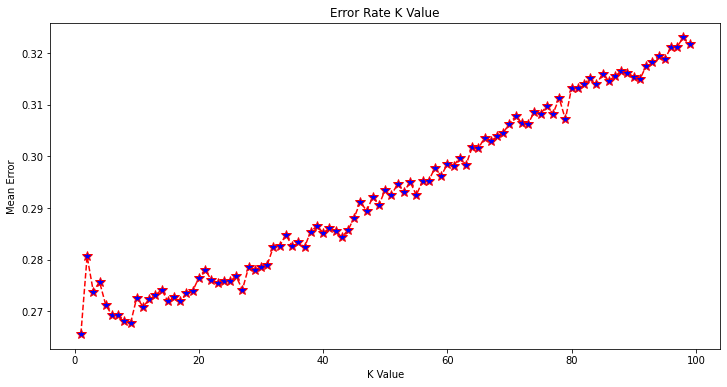

In [65]:
error = []

# Calculating error for K values between 1 and 100
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

print("Optimum K is {}".format(error.index(min(error))))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='*', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
pass

In [66]:
print('Model accuracy is ', accuracy_score(y_test, y_knn_pred))

Model accuracy is  0.7322834645669292


## Support Vector Machines Classifier

In [68]:
from sklearn import svm

classifier_svm = svm.SVC(kernel='rbf', gamma=2)
classifier_svm.fit(X_train, y_train)

y_svm_pred = classifier_svm.predict(X_test)

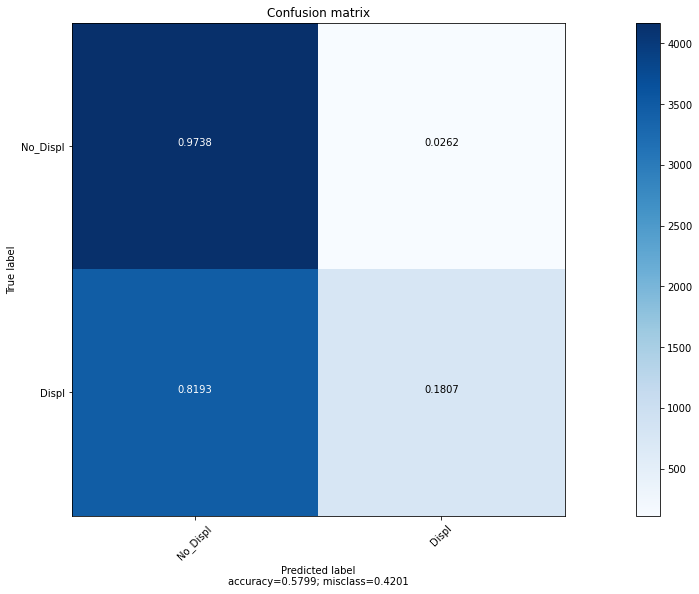

In [69]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_svm_pred), target_names=label, normalize=True)

In [70]:
print(classification_report(y_test, y_svm_pred, target_names=label))

              precision    recall  f1-score   support

    No_Displ       0.55      0.97      0.70      4282
       Displ       0.87      0.18      0.30      4227

    accuracy                           0.58      8509
   macro avg       0.71      0.58      0.50      8509
weighted avg       0.71      0.58      0.50      8509



In [71]:
print('Model accuracy is ', accuracy_score(y_test, y_svm_pred))

Model accuracy is  0.579856622399812


## Logistic Regression Classifier

In [72]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

y_lr_pred=classifier_lr.predict(X_test)

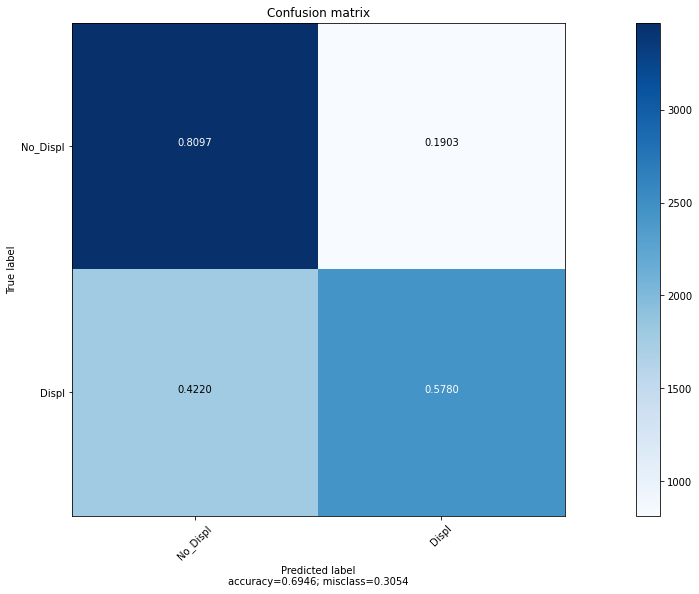

In [73]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_lr_pred), target_names=label, normalize=True)

In [74]:
print(classification_report(y_test, y_lr_pred, target_names=label))

              precision    recall  f1-score   support

    No_Displ       0.66      0.81      0.73      4282
       Displ       0.75      0.58      0.65      4227

    accuracy                           0.69      8509
   macro avg       0.71      0.69      0.69      8509
weighted avg       0.70      0.69      0.69      8509



In [75]:
print('Model accuracy is ', accuracy_score(y_test, y_lr_pred))

Model accuracy is  0.6945587025502409


# Thank you